In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
# CanaryS Swansea YEAR-2020
canarys_swan = pd.read_csv('X:\RA_AirQuality\Datasets\canarys-swansea-elem\hourly\year-2020.csv')
canarys_swan.head()

,DateTime,datetime(Swansea Elementary (CS7)|Canary-S),P25(Swansea Elementary (CS7)|Canary-S),PM10(Swansea Elementary (CS7)|Canary-S),Temp(Swansea Elementary (CS7)|Canary-S)
0,1/1/2020 1:00,NaN,10.29,15.65,38.89
1,1/1/2020 2:00,NaN,21.28,43.16,34.24
2,1/1/2020 3:00,NaN,14.86,26.86,33.11
3,1/1/2020 4:00,NaN,16.65,30.83,31.16
4,1/1/2020 5:00,NaN,20.61,40.03,30.17


In [6]:
canarys_swan = canarys_swan.drop(columns=["datetime(Swansea Elementary (CS7)|Canary-S)"])
canarys_swan.head()

,DateTime,P25(Swansea Elementary (CS7)|Canary-S),PM10(Swansea Elementary (CS7)|Canary-S),Temp(Swansea Elementary (CS7)|Canary-S)
0,1/1/2020 1:00,10.29,15.65,38.89
1,1/1/2020 2:00,21.28,43.16,34.24
2,1/1/2020 3:00,14.86,26.86,33.11
3,1/1/2020 4:00,16.65,30.83,31.16
4,1/1/2020 5:00,20.61,40.03,30.17


In [7]:
canarys_swan = canarys_swan.rename(columns={"P25(Swansea Elementary (CS7)|Canary-S)":"PM2.5", "PM10(Swansea Elementary (CS7)|Canary-S)":"PM10", "Temp(Swansea Elementary (CS7)|Canary-S)":"Temp"})

In [8]:
canarys_swan.describe()

,PM2.5,PM10,Temp
count,8779.000000,8779.000000,8779.000000
mean,9.792648,12.231507,59.226406
std,9.473491,14.556111,22.593802
min,0.000000,0.010000,6.190000
25%,4.470000,3.150000,40.305000
50%,6.350000,6.820000,59.510000
75%,11.090000,15.310000,75.840000
max,198.660000,211.530000,113.370000


In [9]:
canarys_swan['DateTime'] = pd.to_datetime(canarys_swan.DateTime)
canarys_swan.head()

,DateTime,PM2.5,PM10,Temp
0,2020-01-01 01:00:00,10.29,15.65,38.89
1,2020-01-01 02:00:00,21.28,43.16,34.24
2,2020-01-01 03:00:00,14.86,26.86,33.11
3,2020-01-01 04:00:00,16.65,30.83,31.16
4,2020-01-01 05:00:00,20.61,40.03,30.17


In [10]:
canarys_swan_non_indexed = canarys_swan

In [11]:
canarys_swan = canarys_swan.set_index('DateTime')

In [12]:
canarys_swan.head()

,PM2.5,PM10,Temp
DateTime,,,
2020-01-01 01:00:00,10.29,15.65,38.89
2020-01-01 02:00:00,21.28,43.16,34.24
2020-01-01 03:00:00,14.86,26.86,33.11
2020-01-01 04:00:00,16.65,30.83,31.16
2020-01-01 05:00:00,20.61,40.03,30.17


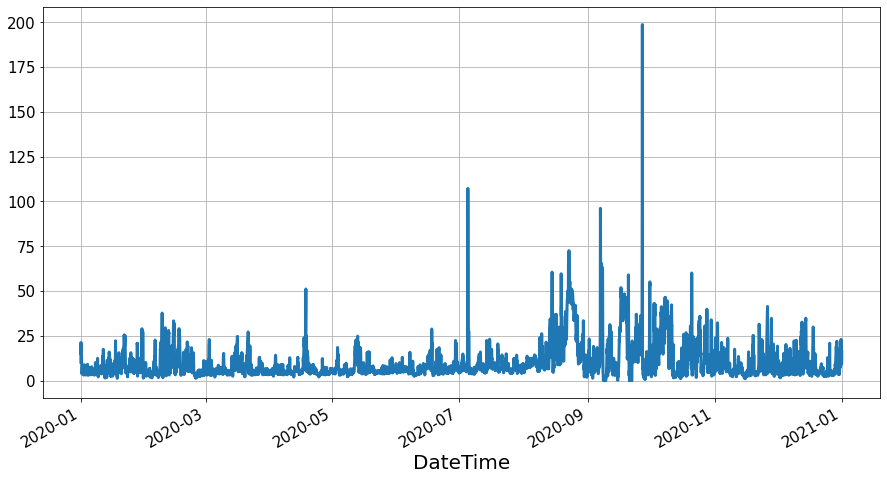

In [15]:
pm_data = canarys_swan['PM2.5']
pm_data.plot(figsize=(15,8), linewidth=3, fontsize=15, grid=True)
plt.xlabel('DateTime', fontsize=20);

In [16]:
canarys_swan['year'] = pd.DatetimeIndex(canarys_swan_non_indexed['DateTime']).year

In [17]:
canarys_swan['month'] = pd.DatetimeIndex(canarys_swan_non_indexed['DateTime']).month

In [18]:
canarys_swan['day'] = pd.DatetimeIndex(canarys_swan_non_indexed['DateTime']).day

In [19]:
canarys_swan['2020':'2021'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                             
       count       mean        std   min     25%     50%      75%     max
month                                                                    
1      744.0   7.369247   4.830206  1.29  4.1100   6.030   8.8500   28.93
2      696.0   8.545963   6.798565  1.46  3.8100   5.915  11.1375   37.71
3      744.0   6.895215   4.355582  1.98  3.9600   5.430   7.7850   27.16
4      720.0   6.050847   4.213184  2.02  4.0475   4.840   6.5150   51.13
5      744.0   6.621788   3.897267  2.17  4.4575   5.240   6.7425   24.82
6      720.0   6.539083   3.484505  2.57  4.4375   5.585   7.1500   28.79
7      742.0   7.974030   5.933084  3.45  5.6550   6.780   9.0075  107.23
8      744.0  18.744059  13.425054  1.87  9.0475  13.185  24.6775   72.52
9      719.0  16.762865  16.725812  0.00  5.2250  11.260  24.1900  198.66
10     743.0  15.347349  11.969644  1.13  5.2750  11.400  23.9000   60.06
11     720.0   8.466194   6.462901  1.05  4.3900   5.985  10.6350   41.39
12     743.0   8.080754   6.771013  1.57  3.8200   5.260   9.4500   34.85

In [20]:
canarys_swan['2020':'2021'][['month','Temp']].groupby('month').describe()

Temp                                                               
       count       mean        std    min      25%     50%      75%     max
month                                                                      
1      744.0  41.159261  13.663584  14.92  31.3650  38.075  49.6050   79.83
2      696.0  36.791422  15.758761   6.19  26.1525  33.365  45.4500   82.46
3      744.0  49.675363  14.973098  18.65  38.6100  46.080  59.8800   87.11
4      720.0  54.593750  18.260855  16.98  41.9400  53.605  68.2375   95.32
5      744.0  67.391626  14.524680  39.60  55.7750  66.285  78.5600  102.63
6      720.0  77.557542  13.763601  44.64  67.0325  76.225  89.0425  106.62
7      742.0  82.328046  12.723371  59.72  71.6250  79.665  92.7825  109.82
8      744.0  82.903212  13.923941  50.99  71.3850  80.275  94.7625  113.15
9      719.0  71.020487  18.486683  34.11  58.4700  68.410  85.2650  113.37
10     743.0  56.404522  21.104305  11.18  42.1150  56.030  68.9750  103.79
11     720.0  50.430569  17.644197  22.41  35.6475  48.315  61.5500   99.42
12     743.0  39.600040  15.477271  14.45  29.3100  35.550  46.5100   92.20

In [21]:
canarys_swan['2020':'2021'][['month','PM2.5', 'PM10','Temp']].groupby('month').agg({'PM2.5':['max','mean'], 'Temp':['min','max','mean']})

PM2.5              Temp                   
          max       mean    min     max       mean
month                                             
1       28.93   7.369247  14.92   79.83  41.159261
2       37.71   8.545963   6.19   82.46  36.791422
3       27.16   6.895215  18.65   87.11  49.675363
4       51.13   6.050847  16.98   95.32  54.593750
5       24.82   6.621788  39.60  102.63  67.391626
6       28.79   6.539083  44.64  106.62  77.557542
7      107.23   7.974030  59.72  109.82  82.328046
8       72.52  18.744059  50.99  113.15  82.903212
9      198.66  16.762865  34.11  113.37  71.020487
10      60.06  15.347349  11.18  103.79  56.404522
11      41.39   8.466194  22.41   99.42  50.430569
12      34.85   8.080754  14.45   92.20  39.600040

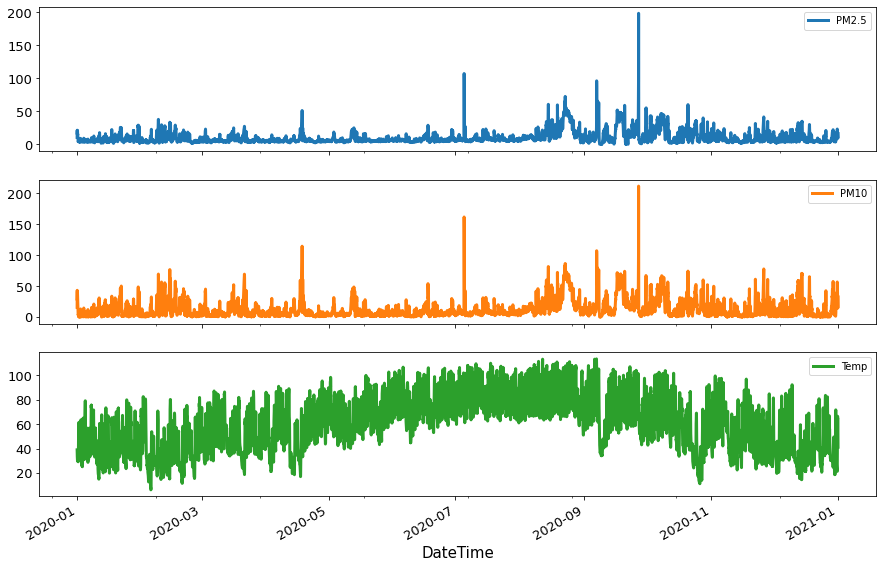

In [25]:
pm_data_2020=canarys_swan[['PM2.5','PM10','Temp']]
pm_data_2020.plot(figsize=(15,10), linewidth=3, fontsize=13, subplots=True)
plt.xlabel('DateTime', fontsize=15);

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'Temp'}>, <AxesSubplot:>]],
      dtype=object)

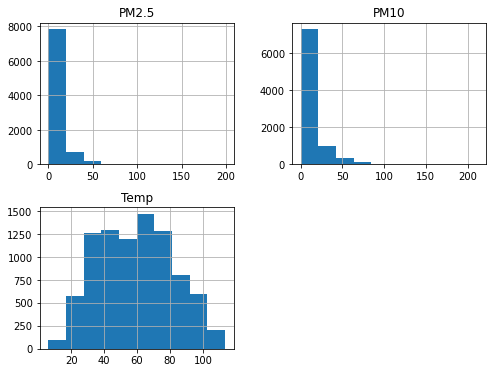

In [85]:
canarys_swan[['PM2.5','PM10','Temp']].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

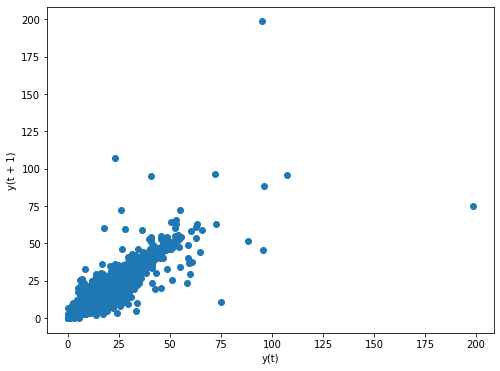

In [86]:
pd.plotting.lag_plot(canarys_swan['PM2.5'],lag=1)

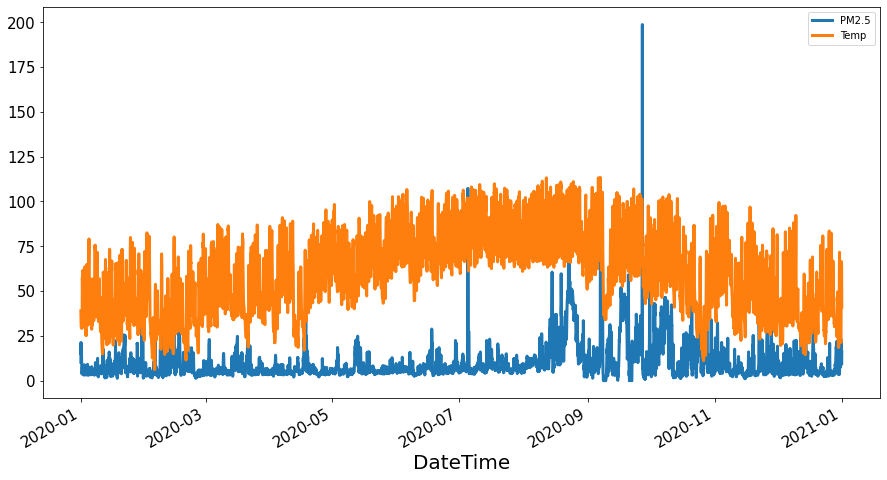

In [87]:
canarys_swan['2020':'2021'][['PM2.5','Temp']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

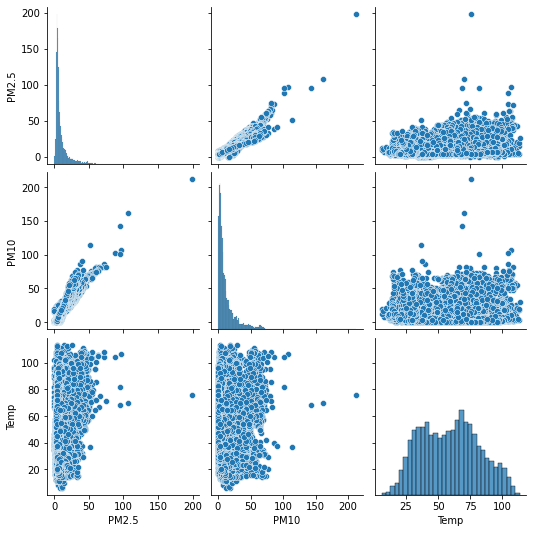

In [88]:
g = sns.pairplot(canarys_swan[['PM2.5','PM10','Temp']])

In [90]:
canarys_swan_corr=canarys_swan[['PM2.5','PM10','Temp']].corr(method='pearson')
canarys_swan_corr

,PM2.5,PM10,Temp
PM2.5,1.000000,0.955474,0.129707
PM10,0.955474,1.000000,-0.016225
Temp,0.129707,-0.016225,1.000000


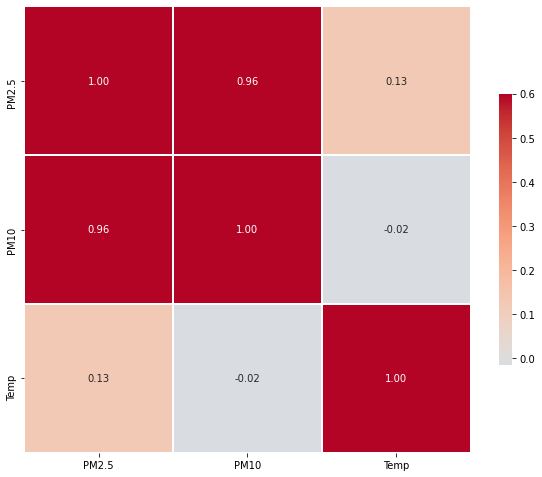

In [91]:
g = sns.heatmap(canarys_swan_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [92]:
canarys_swan_na = canarys_swan.copy()
canarys_swan_na=canarys_swan_na.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

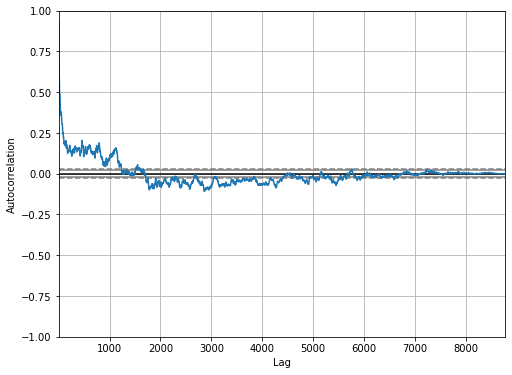

In [93]:
pd.plotting.autocorrelation_plot(canarys_swan_na['2020':'2021']['PM2.5'])

In [94]:
canarys_swan_na['PM2.5'].resample("1m").mean()

DateTime
2020-01-31     7.357322
2020-02-29     8.545963
2020-03-31     6.895215
2020-04-30     6.050847
2020-05-31     6.621788
2020-06-30     6.539083
2020-07-31     7.974030
2020-08-31    18.744059
2020-09-30    16.762865
2020-10-31    15.347349
2020-11-30     8.466194
2020-12-31     8.080754
2021-01-31    16.230000
Freq: M, Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

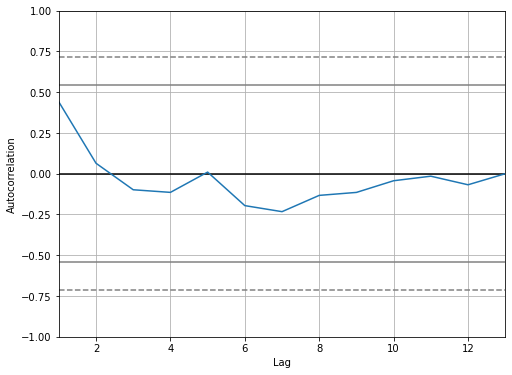

In [95]:
pd.plotting.autocorrelation_plot(canarys_swan_na['2020':'2021']['PM2.5'].resample("1m").mean())